In [1]:
import torch
import matplotlib.pyplot as plt

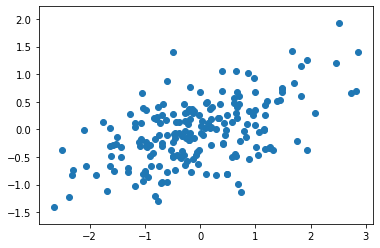

In [2]:
z = torch.randn(200, 2)

cov = torch.tensor([[1, 0.2], [0.2, 0.5]])

Z = z @ cov

plt.scatter(Z[:,0], Z[:,1])
plt.axis("equal")
plt.show()

In [6]:
def findPC(Z):
    dim = Z.shape[1]
    w = torch.randn(dim)
    w /= ((w**2).sum()**0.5)
    #(w * w).sum()
    lr = 0.1

    for epoch in range(101):
        w.requires_grad_(True)
        variance = ((Z @ w.view(-1, 1))**2).mean()
        # variance = torch.var(Z, unbiased=False)

        variance.backward()

        with torch.no_grad():
            w = w + lr * w.grad
            w = w / ((w**2).sum()**0.5)
    return w, variance.item()

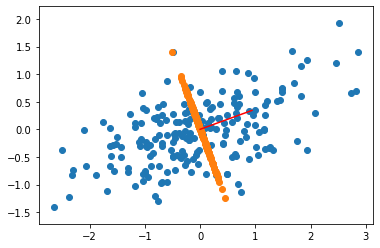

In [9]:
w, v = findPC(Z)
Zp = Z - (Z @ w.view(-1,1)) * w # a vector
plt.scatter(Z[:,0], Z[:,1])
plt.scatter(Zp[:,0], Zp[:,1])

plt.axis("equal")
plt.plot([0,w[0]], [0,w[1]], c = "red")
plt.show() 


In [10]:
def PCA(Z, n):
    W = []
    V = []

    for _ in range(n):
        w, v = findPC(Z)
        W.append(w)
        V.append(v)
        Z = Z - (Z @ w.view(-1,1)) * w

    return W, V

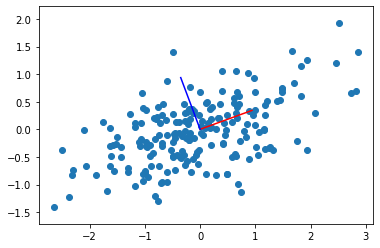

In [14]:
W, V = PCA(Z, 2)

plt.scatter(Z[:,0], Z[:,1])
plt.plot([0,W[0][0]], [0,W[0][1]], c = "red")
plt.plot([0,W[1][0]], [0,W[1][1]], c = "blue")
plt.axis("equal")

plt.show()

In [15]:
 def transform(Z, W):
   return Z @ torch.stack(W).T

In [34]:
import requests


r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

with open("iris.data", "wb") as f:
    f.write(r.content)

vectors = []
answers = []

for line in open("iris.data", "r"):
    try:
        items = line.strip().split(",")
        vectors.append([float(i) for i in items[:4]])
        answers.append(items[4])
    except:
        pass


species = {a: i for i, a in enumerate(set(answers))}
species

{'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2}

In [35]:
X = torch.tensor(vectors)
Z = X - X.mean(dim = 0)

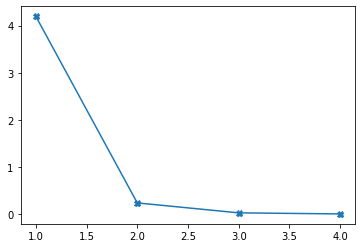

In [40]:
# scree plot
W, V = PCA(Z,4)

plt.plot(range(1,5), V, "-X")
plt.show()

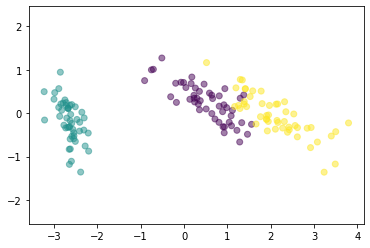

In [49]:
Zt = transform(Z, W)
plt.scatter(Zt[:,0], Zt[:,1], c = [species[a] for a in answers], alpha = 0.5
)

plt.axis("equal")
plt.show()